# Scratchpad

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from IPython.display import Image as IPImage

import os
import PIL
import PIL.Image



import pathlib
import matplotlib.pyplot as plt

In [14]:
# test tensforflow for gpu
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


## Reading in data

In [15]:
# po_train = pd.read_csv('data/GLC24_P0_metadata_train.csv')
pa_train = pd.read_csv('data/GLC24_PA_metadata_train.csv')
pa_test = pd.read_csv('data/GLC24_PA_metadata_test.csv')
sample_submission = pd.read_csv('data/GLC24_SAMPLE_SUBMISSION.csv')

In [16]:
# print('GLC24_P0_metadata_train.csv')
# print(po_train.head())

# lon, lat, year, geoUncertaintyInM, areaInM2, region, country, speciesId, surveyId
print('GLC24_PA_metadata_train.csv')
print(pa_train.head())

# lon, lat, year, geoUncertaintyInM, areaInM2, region, country, surveyId
print('GLC24_PA_metadata_test.csv')
print(pa_test.head())

# surveyId, predictions
print('GLC24_SAMPLE_SUBMISSION.csv')
print(sample_submission.head())

GLC24_PA_metadata_train.csv
        lon        lat  year  geoUncertaintyInM  areaInM2         region  \
0  3.099038  43.134956  2021                5.0     100.0  MEDITERRANEAN   
1  3.099038  43.134956  2021                5.0     100.0  MEDITERRANEAN   
2  3.099038  43.134956  2021                5.0     100.0  MEDITERRANEAN   
3  3.099038  43.134956  2021                5.0     100.0  MEDITERRANEAN   
4  3.099038  43.134956  2021                5.0     100.0  MEDITERRANEAN   

  country  speciesId  surveyId  
0  France     6874.0       212  
1  France      476.0       212  
2  France    11157.0       212  
3  France     8784.0       212  
4  France     4530.0       212  
GLC24_PA_metadata_test.csv
         lon       lat  year  geoUncertaintyInM  areaInM2       region  \
0  10.033550  57.12081  2019               10.0     707.0  CONTINENTAL   
1   7.333000  46.22997  2019                NaN      10.0       ALPINE   
2   1.843658  42.58006  2018                0.0      -inf       ALPI

0200


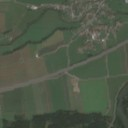

In [17]:
pa_test_satellitepatches_rgb_data_dir = pathlib.Path('./data/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb')
# list directories
for cd in pa_test_satellitepatches_rgb_data_dir.iterdir():
    for ab in cd.iterdir():
        for filename in ab.iterdir():
            print(filename.name[-9:-5])
            pil_img = IPImage(filename)
            display(pil_img)
            break
        break
    break


In [18]:
# batch_size = 32
# img_height = 128
# img_width = 128

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   pa_test_satellitepatches_rgb_data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)




In [19]:
pa_train.describe()

/home/startung/code/ml-geolife/.venv/lib64/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,lon,lat,year,geoUncertaintyInM,areaInM2,speciesId,surveyId
count,1.483637e+06,1.483637e+06,1.483637e+06,1.471141e+06,1300365.0,1.483637e+06,1.483637e+06
mean,9.024850e+00,5.242552e+01,2.018179e+03,7.483046e+00,-inf,5.811442e+03,1.969927e+06
std,4.437247e+00,4.853112e+00,1.094525e+00,6.190821e+00,NaN,3.392812e+03,1.135967e+06
min,-9.018346e+00,3.511705e+01,2.017000e+03,0.000000e+00,-inf,2.000000e+00,2.120000e+02
25%,6.052593e+00,4.856769e+01,2.017000e+03,3.000000e+00,25.0,2.847000e+03,9.768390e+05
50%,9.380850e+00,5.515287e+01,2.018000e+03,1.000000e+01,79.0,6.079000e+03,1.976273e+06
75%,1.041882e+01,5.626047e+01,2.019000e+03,1.000000e+01,79.0,8.818000e+03,2.960059e+06
max,2.915421e+01,5.989300e+01,2.021000e+03,1.000000e+02,8000.0,1.125400e+04,3.919655e+06


In [20]:
pa_train.speciesId = pa_train.speciesId.astype('int64')

In [21]:
pa_train.describe()

/home/startung/code/ml-geolife/.venv/lib64/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,lon,lat,year,geoUncertaintyInM,areaInM2,speciesId,surveyId
count,1.483637e+06,1.483637e+06,1.483637e+06,1.471141e+06,1300365.0,1.483637e+06,1.483637e+06
mean,9.024850e+00,5.242552e+01,2.018179e+03,7.483046e+00,-inf,5.811442e+03,1.969927e+06
std,4.437247e+00,4.853112e+00,1.094525e+00,6.190821e+00,NaN,3.392812e+03,1.135967e+06
min,-9.018346e+00,3.511705e+01,2.017000e+03,0.000000e+00,-inf,2.000000e+00,2.120000e+02
25%,6.052593e+00,4.856769e+01,2.017000e+03,3.000000e+00,25.0,2.847000e+03,9.768390e+05
50%,9.380850e+00,5.515287e+01,2.018000e+03,1.000000e+01,79.0,6.079000e+03,1.976273e+06
75%,1.041882e+01,5.626047e+01,2.019000e+03,1.000000e+01,79.0,8.818000e+03,2.960059e+06
max,2.915421e+01,5.989300e+01,2.021000e+03,1.000000e+02,8000.0,1.125400e+04,3.919655e+06


In [22]:
print("Before")
pa_train.head()
pa_train.query('surveyId == 212')

Before


,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530,212
5,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,10520,212
6,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,9458,212
7,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,982,212
8,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,51,212
9,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,3935,212


In [23]:
threshold = 100
value_counts = pa_train.stack().value_counts() # Entire DataFrame
to_remove = value_counts[value_counts < threshold].index

In [24]:
#pa_train_reduced = pa_train.replace(to_remove, np.nan, inplace=False)

In [26]:
print(len(pa_train))
print(len(to_remove))
#print(len(pa_train_reduced))

1483637
259409


In [27]:
categories = pa_train.speciesId.unique()
dict_categories = dict(zip(categories, range(len(categories))))
print(dict_categories)

{6874: 0, 476: 1, 11157: 2, 8784: 3, 4530: 4, 10520: 5, 9458: 6, 982: 7, 51: 8, 3935: 9, 11193: 10, 2421: 11, 2159: 12, 9030: 13, 2932: 14, 1304: 15, 9816: 16, 540: 17, 4499: 18, 433: 19, 254: 20, 5386: 21, 3227: 22, 6079: 23, 6964: 24, 1387: 25, 4638: 26, 5384: 27, 6491: 28, 10223: 29, 10218: 30, 4077: 31, 129: 32, 9024: 33, 9028: 34, 2386: 35, 694: 36, 9388: 37, 146: 38, 6788: 39, 2474: 40, 981: 41, 8151: 42, 10247: 43, 5189: 44, 1888: 45, 5071: 46, 2852: 47, 3722: 48, 2025: 49, 11195: 50, 10274: 51, 10317: 52, 5900: 53, 4483: 54, 581: 55, 3275: 56, 1795: 57, 2885: 58, 3067: 59, 9465: 60, 1910: 61, 8208: 62, 9892: 63, 6962: 64, 6848: 65, 6331: 66, 6574: 67, 963: 68, 9669: 69, 10385: 70, 9647: 71, 10896: 72, 7760: 73, 5542: 74, 7957: 75, 6208: 76, 1818: 77, 4105: 78, 3451: 79, 2799: 80, 8983: 81, 1092: 82, 9253: 83, 2777: 84, 1162: 85, 3662: 86, 5804: 87, 167: 88, 10998: 89, 4640: 90, 2921: 91, 6643: 92, 5398: 93, 9921: 94, 4758: 95, 178: 96, 10904: 97, 5764: 98, 8751: 99, 4748: 100, 

In [28]:

pa_train_with_mapping = pa_train.copy()
pa_train_with_mapping.speciesId = pa_train.speciesId.map(lambda x: np.where(categories == x)[0][0])

In [29]:
print("After")
pa_train_with_mapping.head()
pa_train_with_mapping.query('surveyId == 212')
pa_train_with_mapping.speciesId.value_counts()

After


speciesId
17      21489
230     19791
20      18117
18      15270
52      14570
        ...  
4376        1
4380        1
4386        1
4387        1
5015        1
Name: count, Length: 5016, dtype: int64

In [30]:
pa_features = pa_train_with_mapping.copy()
pa_labels = pa_features.pop('speciesId')

In [31]:
pa_features.drop(['region', 'country'], axis=1, inplace=True)

In [32]:
pa_features.head()

,lon,lat,year,geoUncertaintyInM,areaInM2,surveyId
0,3.099038,43.134956,2021,5.0,100.0,212
1,3.099038,43.134956,2021,5.0,100.0,212
2,3.099038,43.134956,2021,5.0,100.0,212
3,3.099038,43.134956,2021,5.0,100.0,212
4,3.099038,43.134956,2021,5.0,100.0,212


In [33]:
len(pa_labels.unique())
pa_labels.head()

0    0
1    1
2    2
3    3
4    4
Name: speciesId, dtype: int64

In [34]:
input_layer = layers.Input(shape=(pa_features.shape[1],))
dense_layer_1 = layers.Dense(128, activation='relu')(input_layer)
dense_layer_2 = layers.Dense(128, activation='relu')(dense_layer_1)
output_layer = layers.Dense(len(pa_labels.unique()), activation='softmax')(dense_layer_2)

model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5016)           │       647,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,472 (2.53 MB)

 Trainable params: 664,472 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
print(pa_labels.shape)
print(pa_features.shape)

(1483637,)
(1483637, 6)


In [36]:
#pa_labels_one_hot = np.expand_dims(pa_labels, axis=-1)

In [37]:
pa_labels.tail()

1483632    156
1483633     46
1483634    117
1483635    155
1483636     68
Name: speciesId, dtype: int64

In [38]:
pa_labels_first_10000 = pa_labels.iloc[:10000]
pa_features_first_10000 = pa_features.iloc[:10000]

In [39]:
pa_labels_one_hot = tf.one_hot(pa_labels, depth=5016)

In [40]:
model.fit(pa_features, pa_labels_one_hot, epochs=10, batch_size=32)

Epoch 1/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - acc: 0.0142 - loss: 20.9614
Epoch 2/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - acc: 0.0146 - loss: 6.3703
Epoch 3/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 105s 2ms/step - acc: 0.0143 - loss: 6.3723
Epoch 4/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - acc: 0.0142 - loss: 6.3750
Epoch 5/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 105s 2ms/step - acc: 0.0144 - loss: 6.3782
Epoch 6/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - acc: 0.0145 - loss: 6.3823
Epoch 7/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 105s 2ms/step - acc: 0.0145 - loss: 6.3854
Epoch 8/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - acc: 0.0146 - loss: 6.3860
Epoch 9/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - acc: 0.0144 - loss: 6.3868
Epoch 10/10
46364/46364 ━━━━━━━━━━━━━━━━━━━━ 105s 2ms/step - acc: 0.0143 - loss: 6.3893


In [43]:
pa_test.drop(['region', 'country'], axis=1, inplace=True)
pa_test.head()

,lon,lat,year,geoUncertaintyInM,areaInM2,surveyId
0,10.033550,57.12081,2019,10.0,707.0,642
1,7.333000,46.22997,2019,NaN,10.0,1792
2,1.843658,42.58006,2018,0.0,-inf,3256
3,11.720090,46.26149,2021,10.0,35.0,3855
4,9.361870,55.90245,2017,10.0,79.0,4889


In [48]:
raw_results = model.predict(pa_test)



148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step


AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [51]:
for result in raw_results:
    print(result)
    print(result.argmax())

[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09 1.6666301e-09
 1.5028542e-09]
17
[6.2838063e-04 4.2070961e-04 1.2793069e-03 ... 1.5259036e-09